# **ACCESO, CONVERSIONES Y LIMPIEZA DE DATOS**

In [1]:
# Importar librerías
import pandas as pd
import numpy as np

In [2]:
#Leer CSV

invoices = pd.read_csv('https://raw.githubusercontent.com/FBosler/you-datascientist/master/invoices.csv')

## **TIPO DE DATOS, ACCESOS Y CONVERSIONES**

Hay 7 tipos de datos: 

*   **object**: este tipo de datos se utiliza para cadenas (es decir, secuencias de caracteres).

*   **int64**: Usado para números enteros (números enteros, sin decimales)

*   **float64**: Usado para números de coma flotante (es decir, cifras con decimales/fracciones)

*   **bool**: Usado para valores que solo pueden ser Verdadero/Falso

*   **datetime64**: Usado para valores de fecha y hora

*   **timedelta**: se utiliza para representar la diferencia entre fechas y horas

*   **category**: se usa para valores que toman uno de un número limitado de opciones disponibles (las categorías no tienen que hacerlo, pero pueden tener un orden explícito).

In [3]:
invoices.head(3)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,False


In [4]:
invoices.dtypes

Order Id              object
Date                  object
Meal Id               object
Company Id            object
Date of Meal          object
Participants          object
Meal Price           float64
Type of Meal          object
Heroes Adjustment       bool
dtype: object

In [5]:
def relative_unique(df, col):
    print(f"{col}: {100 *  invoices[col].nunique() / len(invoices):.2f}%")

In [6]:
for col in invoices.columns:
    relative_unique(invoices, col)

Order Id: 100.00%
Date: 3.65%
Meal Id: 100.00%
Company Id: 9.45%
Date of Meal: 31.37%
Participants: 55.43%
Meal Price: 2.01%
Type of Meal: 0.01%
Heroes Adjustment: 0.00%


In [8]:
invoices['Type of Meal'].value_counts()

Dinner       16732
Breakfast    16663
Lunch        16622
Name: Type of Meal, dtype: int64

#### **Uso de .astype()**

In [ ]:
invoices['Date'] = invoices['Date'].astype('datetime64')
invoices['Type of Meal'] = invoices['Type of Meal'].astype('category')
invoices['Meal Price'] = invoices['Meal Price'].astype('int64')
invoices.dtypes

In [10]:
invoices['Date']= invoices['Date'].astype('datetime64')
invoices['Type of Meal']= invoices['Type of Meal'].astype('category')
invoices['Meal Price'] = invoices['Meal Price'].astype('int64')
invoices.dtypes

<ipython-input-10-d45ce6e3879b>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  invoices['Date']= invoices['Date'].astype('datetime64')


Order Id                     object
Date                 datetime64[ns]
Meal Id                      object
Company Id                   object
Date of Meal                 object
Participants                 object
Meal Price                    int64
Type of Meal               category
Heroes Adjustment              bool
dtype: object

### **CONVERTIR TIPOS DE DATOS**

Hay dos formas estándar de convertir tipos de datos de pandas usando funciones auxiliares de conversión ``` .astype( )```, como: ``` pd.to_numeric ``` o ``` pd.to_datetime ```.

#### **Uso de pd.to_numeric**

In [11]:
### introduzcamos un error
invoices.loc[45612,'Meal Price'] = 'I am here'
invoices.loc[45620,'Meal Price'] = 'Me too'

In [12]:
invoices.dtypes

Order Id                     object
Date                 datetime64[ns]
Meal Id                      object
Company Id                   object
Date of Meal                 object
Participants                 object
Meal Price                   object
Type of Meal               category
Heroes Adjustment              bool
dtype: object

In [ ]:
invoices['Meal Price'] = pd.to_numeric(invoices['Meal Price'])#,errors = 'coerce')
#invoices1 = invoices[invoices['Meal Price'].isnull()]
#invoices1
invoices.dtypes

Order Id              object
Date                  object
Meal Id               object
Company Id            object
Date of Meal          object
Participants          object
Meal Price           float64
Type of Meal          object
Heroes Adjustment       bool
dtype: object

In [14]:
invoices['Meal Price']=pd.to_numeric(invoices['Meal Price'], errors="coerce") #coerce sets an invalid parsing will be set as NaN

In [16]:
invoices1 = invoices[invoices['Meal Price'].isnull()]
invoices1

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
45612,SJA1F92KXWZDH398,2017-02-26,OOW0UEXQY5RMPPZ8,ICNGUMLKEB27T1P3,2017-03-02 20:00:00+01:00,['Betty Stroud'],NaN,Dinner,False
45620,2DKPL6A229CN4WH3,2014-05-22,JH8G8O5LQEUF7U3W,OJKDXPQQXYUOGGJB,2014-05-20 20:00:00+02:00,['Alex Ellis' 'Angela Aguirre'],NaN,Dinner,False


In [18]:
invoices.dtypes

Order Id                     object
Date                 datetime64[ns]
Meal Id                      object
Company Id                   object
Date of Meal                 object
Participants                 object
Meal Price                  float64
Type of Meal               category
Heroes Adjustment              bool
dtype: object

#### **Uso de pd.to_datetime**

In [19]:
print(pd.to_datetime('2019-8-1'))
print(pd.to_datetime('Aug, 1 2019'))
print(pd.to_datetime('20190801'))

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00


In [ ]:
pd.to_datetime('20190108',format = '%Y%d%m')

In [21]:
pd.to_datetime('20190108', format = '%Y%d%m')

Timestamp('2019-08-01 00:00:00')

In [22]:
pd.to_datetime('yonn 20190108',format = '%Y%d%m',exact = False)
pd.to_datetime('yonn 20190108', format = '%Y%d%m', exact = False)

Timestamp('2019-08-01 00:00:00')

In [23]:
invoices['Date'] = pd.to_datetime(invoices['Date'])
invoices['Date'] = pd.to_datetime(invoices['Date'])#

In [24]:
invoices.dtypes

Order Id                     object
Date                 datetime64[ns]
Meal Id                      object
Company Id                   object
Date of Meal                 object
Participants                 object
Meal Price                  float64
Type of Meal               category
Heroes Adjustment              bool
dtype: object

### **ACCESO ÚTILES A TIPOS DE DATOS**

Hay tres accesorios diferentes: **dt, str** y **cat**

#### **Uso de dt**

In [25]:
invoices['Date'].dt.date
invoices['Date'].dt.date

0        2016-05-27
1        2018-09-27
2        2014-08-24
3        2014-04-12
4        2015-07-28
            ...    
50012    2017-09-20
50013    2018-03-19
50014    2017-09-21
50015    2018-01-28
50016    2017-09-06
Name: Date, Length: 50017, dtype: object

In [26]:
invoices['Date'].dt.year
invoices['Date'].dt.year

0        2016
1        2018
2        2014
3        2014
4        2015
         ... 
50012    2017
50013    2018
50014    2017
50015    2018
50016    2017
Name: Date, Length: 50017, dtype: int64

In [28]:
invoices['Date'].dt.day
invoices['Date'].dt.day

0        27
1        27
2        24
3        12
4        28
         ..
50012    20
50013    19
50014    21
50015    28
50016     6
Name: Date, Length: 50017, dtype: int64

In [29]:
invoices['Date'].dt.day_name()
invoices['Date'].dt.day_name()

0           Friday
1         Thursday
2           Sunday
3         Saturday
4          Tuesday
           ...    
50012    Wednesday
50013       Monday
50014     Thursday
50015       Sunday
50016    Wednesday
Name: Date, Length: 50017, dtype: object

In [30]:
invoices['Date'].dt.month_name()
invoices['Date'].dt.month_name()

0              May
1        September
2           August
3            April
4             July
           ...    
50012    September
50013        March
50014    September
50015      January
50016    September
Name: Date, Length: 50017, dtype: object

In [31]:
invoices['Date'].dt.days_in_month
invoices['Date'].dt.days_in_month

0        31
1        30
2        31
3        30
4        31
         ..
50012    30
50013    31
50014    30
50015    31
50016    30
Name: Date, Length: 50017, dtype: int64

Los períodos disponibles para ``` dt.to_period()``` son **W, M, Q** e **Y**, lo que convierte las fechas en períodos

In [33]:
invoices['Date'].dt.to_period('W')

0        2016-05-23/2016-05-29
1        2018-09-24/2018-09-30
2        2014-08-18/2014-08-24
3        2014-04-07/2014-04-13
4        2015-07-27/2015-08-02
                 ...          
50012    2017-09-18/2017-09-24
50013    2018-03-19/2018-03-25
50014    2017-09-18/2017-09-24
50015    2018-01-22/2018-01-28
50016    2017-09-04/2017-09-10
Name: Date, Length: 50017, dtype: period[W-SUN]

In [32]:
invoices['Date'].dt.to_period('M')

0        2016-05
1        2018-09
2        2014-08
3        2014-04
4        2015-07
          ...   
50012    2017-09
50013    2018-03
50014    2017-09
50015    2018-01
50016    2017-09
Name: Date, Length: 50017, dtype: period[M]

In [34]:
invoices['Date'].dt.to_period('Q')

0        2016Q2
1        2018Q3
2        2014Q3
3        2014Q2
4        2015Q3
          ...  
50012    2017Q3
50013    2018Q1
50014    2017Q3
50015    2018Q1
50016    2017Q3
Name: Date, Length: 50017, dtype: period[Q-DEC]

In [36]:
invoices['Date'].dt.to_period('Y')

0        2016
1        2018
2        2014
3        2014
4        2015
         ... 
50012    2017
50013    2018
50014    2017
50015    2018
50016    2017
Name: Date, Length: 50017, dtype: period[A-DEC]

#### **Uso de str**

Existen funciones como:

*   **str.lower()**
*   **str.upper()**
*   **str.swapcase()**
*   **str.title()**

Que ayudan a administrar un formato de letra en las cadenas.

In [38]:
invoices['Type of Meal'].str.title()
invoices['Type of Meal'].str.title()

0        Breakfast
1           Dinner
2            Lunch
3           Dinner
4            Lunch
           ...    
50012    Breakfast
50013    Breakfast
50014       Dinner
50015       Dinner
50016        Lunch
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.zfill(width = 15)

In [39]:
invoices['Type of Meal'].str.zfill(width=15)

0        000000Breakfast
1        000000000Dinner
2        0000000000Lunch
3        000000000Dinner
4        0000000000Lunch
              ...       
50012    000000Breakfast
50013    000000Breakfast
50014    000000000Dinner
50015    000000000Dinner
50016    0000000000Lunch
Name: Type of Meal, Length: 50017, dtype: object

In [40]:
invoices[invoices['Type of Meal'].str.endswith('ast')]
invoices[invoices['Type of Meal'].str.endswith('ast')]

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
7,FM608JK1N01BPUQN,2014-05-08,E8WJZ1FOSKZD2MJN,36MFTZOYMTAJP1RK,2014-05-07 09:00:00+02:00,['Amanda Knowles' 'Cheryl Feaster' 'Ginger Hoa...,320.0,Breakfast,False
11,8RIGCF74GUEQHQEE,2018-07-23,5XK0KTFTD6OAP9ZP,36MFTZOYMTAJP1RK,2018-07-27 08:00:00+02:00,['Amanda Knowles'],210.0,Breakfast,False
12,TH60C9D8TPYS7DGG,2016-12-15,KDSMP2VJ22HNEPYF,36MFTZOYMTAJP1RK,2016-12-13 08:00:00+01:00,['Cheryl Feaster' 'Bret Adams' 'Ginger Hoagland'],755.0,Breakfast,False
17,KNF3E3QTOQ22J269,2018-06-20,737T2U7604ABDFDF,36MFTZOYMTAJP1RK,2018-06-15 07:00:00+02:00,['Glenn Gould' 'Cheryl Feaster' 'Ginger Hoagla...,475.0,Breakfast,False
...,...,...,...,...,...,...,...,...,...
50008,UHIE76EGIC2KFP34,2016-08-06,BFLY4LHHUI5OIREM,FC1LJXHNH2883N3Y,2016-08-08 08:00:00+02:00,['Jerry Nelson'],164.0,Breakfast,False
50009,FWH3N8N5ARW53BE6,2016-03-17,WHVI4J3J388I8I4B,FC1LJXHNH2883N3Y,2016-03-12 09:00:00+01:00,['Jon Ponce' 'Alice Allen'],523.0,Breakfast,False
50011,81J2RM0YM63VAT0K,2018-06-03,HNXSJZQ120WGAWZP,E4K99D4JR9E40VE1,2018-06-03 07:00:00+02:00,['Chester Mortimer' 'Robin Ramos'],598.0,Breakfast,False
50012,4OMS8ZSA0UX8LHWI,2017-09-20,1TD5MROATV1NHZ4Y,E4K99D4JR9E40VE1,2017-09-21 08:00:00+02:00,['Regina Shirley'],9.0,Breakfast,False


In [41]:
invoices[invoices['Type of Meal'].str.contains('ast')]
invoices[invoices['Type of Meal'].str.contains('ast')]

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
7,FM608JK1N01BPUQN,2014-05-08,E8WJZ1FOSKZD2MJN,36MFTZOYMTAJP1RK,2014-05-07 09:00:00+02:00,['Amanda Knowles' 'Cheryl Feaster' 'Ginger Hoa...,320.0,Breakfast,False
11,8RIGCF74GUEQHQEE,2018-07-23,5XK0KTFTD6OAP9ZP,36MFTZOYMTAJP1RK,2018-07-27 08:00:00+02:00,['Amanda Knowles'],210.0,Breakfast,False
12,TH60C9D8TPYS7DGG,2016-12-15,KDSMP2VJ22HNEPYF,36MFTZOYMTAJP1RK,2016-12-13 08:00:00+01:00,['Cheryl Feaster' 'Bret Adams' 'Ginger Hoagland'],755.0,Breakfast,False
17,KNF3E3QTOQ22J269,2018-06-20,737T2U7604ABDFDF,36MFTZOYMTAJP1RK,2018-06-15 07:00:00+02:00,['Glenn Gould' 'Cheryl Feaster' 'Ginger Hoagla...,475.0,Breakfast,False
...,...,...,...,...,...,...,...,...,...
50008,UHIE76EGIC2KFP34,2016-08-06,BFLY4LHHUI5OIREM,FC1LJXHNH2883N3Y,2016-08-08 08:00:00+02:00,['Jerry Nelson'],164.0,Breakfast,False
50009,FWH3N8N5ARW53BE6,2016-03-17,WHVI4J3J388I8I4B,FC1LJXHNH2883N3Y,2016-03-12 09:00:00+01:00,['Jon Ponce' 'Alice Allen'],523.0,Breakfast,False
50011,81J2RM0YM63VAT0K,2018-06-03,HNXSJZQ120WGAWZP,E4K99D4JR9E40VE1,2018-06-03 07:00:00+02:00,['Chester Mortimer' 'Robin Ramos'],598.0,Breakfast,False
50012,4OMS8ZSA0UX8LHWI,2017-09-20,1TD5MROATV1NHZ4Y,E4K99D4JR9E40VE1,2017-09-21 08:00:00+02:00,['Regina Shirley'],9.0,Breakfast,False


## **LIMPIEZA DE DATOS**

### **DATOS FALTANTES**

In [42]:
for col in invoices.columns[2:]:
    invoices[col] = np.where(
        np.random.binomial(
            1, np.random.random() / 50, size = len(invoices)) == 1, 
        np.nan, invoices[col])

In [43]:
invoices.isnull().sum()

Order Id               0
Date                   0
Meal Id              123
Company Id           994
Date of Meal         628
Participants         306
Meal Price           900
Type of Meal         645
Heroes Adjustment    334
dtype: int64

#### **FILTRANDO DATOS FALTANTES**

In [47]:
invoices[invoices.isnull().sum(axis=1) > 0].head()
invoices[invoices.isnull().sum(axis=1)>0].head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
21,5SYB15QEFWD1E4Q4,2017-07-09,KZI0VRU30GLSDYHA,H3JRC7XX7WJAD4ZO,2017-07-13 08:00:00+02:00,['Anthony Emerson' 'Emma Steitz' 'Melba Inlow'...,191.0,NaN,0.0
41,CPCL6LVOZUKO5THR,2017-02-19,HCF69NG6CBDGFL90,NaN,2017-02-18 13:00:00+01:00,['Cheryl Wooster'],372.0,Lunch,0.0
73,III4SSOWCHFS17YQ,2018-04-12,6DOPYREM9RRTJTK4,NBJDWUB8J2DHLH29,2018-04-08 14:00:00+02:00,['Jessica Murphy'],402.0,NaN,0.0
77,CJD4ZTWZDVO1BBI8,2014-11-21,8L1CBA5XEMVSQRHP,NaN,2014-11-19 09:00:00+01:00,['Irving Henshaw'],178.0,Breakfast,0.0
85,US1A0DHSYO98LPXQ,2018-01-18,X24WZJ18DI9JSIQA,D3Q0HECTK80RRGGO,2018-01-16 22:00:00+01:00,['Donald Pickett'],629.0,NaN,0.0


In [50]:
invoices[invoices['Meal Id'].isnull()].head()
invoices[invoices['Meal Id'].isnull()].head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
105,MQOV98NN4CB77EQJ,2016-08-11,NaN,7FLAHMERFCITB6RT,2016-08-15 08:00:00+02:00,['Hilda Duncan'],516.0,Breakfast,0.0
491,NDXUMSZ2G4438CBV,2015-12-27,NaN,447Q6WU5EYDNNPLU,2015-12-30 14:00:00+01:00,['Ashley Dreesman'],300.0,Lunch,0.0
559,WPXSF3Z5LGSJABPY,2017-11-12,NaN,U81JHOSTUDI8ZG4Q,2017-11-13 12:00:00+01:00,['Mary Roseberry'],156.0,Lunch,0.0
1238,6GR7MT0DX69WDFF6,2014-06-23,NaN,7QIDTMN83BDTITO5,2014-06-26 12:00:00+02:00,['Virgilio Carlton'],606.0,Lunch,0.0
1516,BHQZFKX6FY5VNRE4,2015-05-29,NaN,2NE3XF2X7NXOMWEH,2015-05-29 12:00:00+02:00,['Diana Fields' 'Essie Jackson'],28.0,Lunch,1.0


In [51]:
invoices[invoices['Meal Id'].notnull()].head()
invoices[invoices['Meal Id'].notnull()].head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,0.0
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,0.0
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,0.0
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,0.0
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,0.0


Usando DataFrame

In [52]:
invoices.dropna(axis=1).head()
invoices.dropna(axis=1).head()

,Order Id,Date
0,839FKFW2LLX4LMBB,2016-05-27
1,97OX39BGVMHODLJM,2018-09-27
2,041ORQM5OIHTIU6L,2014-08-24
3,YT796QI18WNGZ7ZJ,2014-04-12
4,6YLROQT27B6HRF4E,2015-07-28


In [53]:
len(invoices.dropna(how='all'))
len(invoices.dropna(how='all'))

50017

In [54]:
len(invoices.dropna(how='any'))
len(invoices.dropna(how='any'))

46223

In [55]:
len(invoices.dropna(subset=['Participants']))
len(invoices.dropna(subset=['Participants']))

49711

El metodo ```.dropna()``` nos permite eliminar las filas, columnas que contienen valores NaN, asi mismo por sus parametros podemos definir si seran filas(0) o columnas(1) el parametro ```how = "any"``` (elimina cualquier fila que contenga almenos un valor NaN) el parametro ```how = "all"``` (elimina cualquier fila que contenga todos un valor NaN)

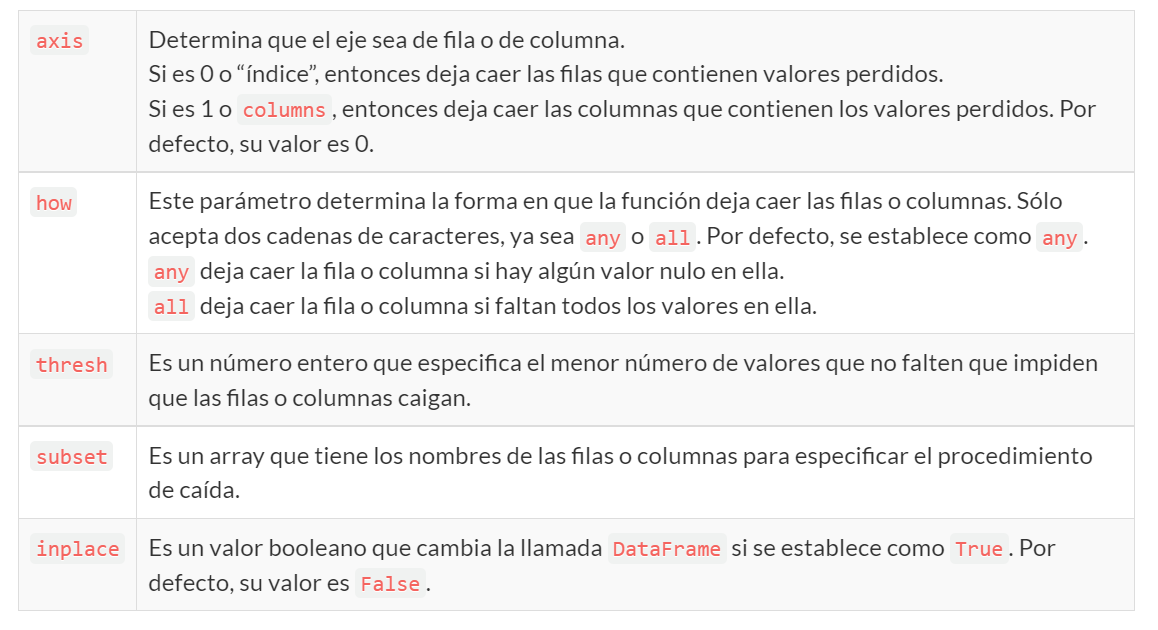

#### **LLENANDO DATOS FALTANTES**

La función pandas ```.DataFrame.fillna()``` reemplaza los valores NaN en DataFrame con algún valor determinado.

In [56]:
invoices.fillna(value=0)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,0.0
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,0.0
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,0.0
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,0.0
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,0.0
...,...,...,...,...,...,...,...,...,...
50012,4OMS8ZSA0UX8LHWI,2017-09-20,1TD5MROATV1NHZ4Y,E4K99D4JR9E40VE1,2017-09-21 08:00:00+02:00,['Regina Shirley'],9.0,Breakfast,0.0
50013,RR0VKJN8V0KHNKGG,2018-03-19,22EX9VZSJKHP4AIP,E4K99D4JR9E40VE1,2018-03-18 09:00:00+01:00,['Robin Ramos' 'Chester Mortimer'],25.0,Breakfast,0.0
50014,STJ6QJC30WPRM93H,2017-09-21,LMX18PNGWCIMG1QW,E4K99D4JR9E40VE1,2017-09-22 21:00:00+02:00,['Robin Ramos'],160.0,Dinner,0.0
50015,QHEUIYNC0XQX7GDR,2018-01-28,4U0VH2TGQL30X23X,E4K99D4JR9E40VE1,2018-02-01 21:00:00+01:00,['Chester Mortimer' 'Robin Ramos'],497.0,Dinner,0.0


In [59]:
invoices.fillna(method = 'ffill').head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,0.0
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,0.0
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,0.0
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,0.0
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,0.0


In [61]:
invoices['Meal Price'].fillna(invoices['Meal Price'].median())

0        469.0
1         22.0
2        314.0
3        438.0
4        690.0
         ...  
50012      9.0
50013     25.0
50014    160.0
50015    497.0
50016    365.0
Name: Meal Price, Length: 50017, dtype: float64

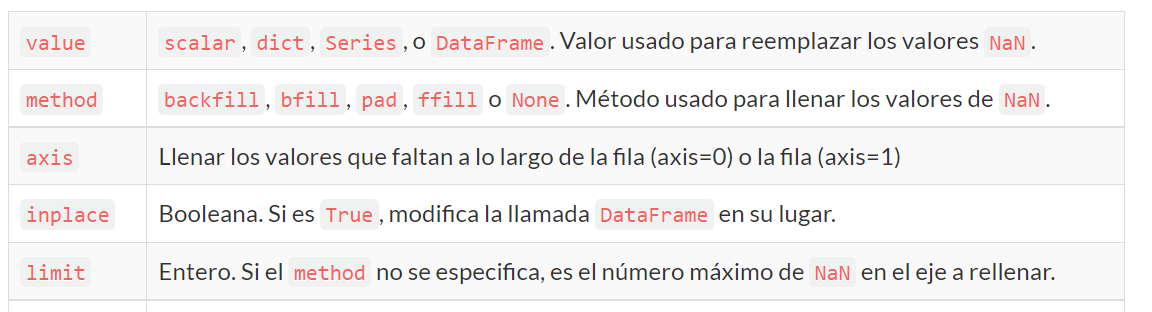

Podemos especificar a traves de un diccionario dentro del metodo **fillna()** valores especificos para cada columna.

El parametro **inplace**, nos permite especificar un valor **True** o **False**, para decir si se hara el rellenado en el mismo dataframe, eliminando el dataframe anterior.

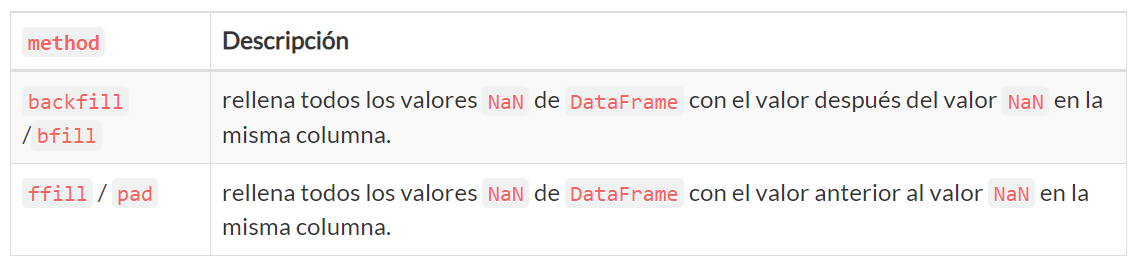

## Remplazar valores

In [63]:
invoices['Type of Meal'].replace('Breakfast','desayuno')

0        desayuno
1          Dinner
2           Lunch
3          Dinner
4           Lunch
           ...   
50012    desayuno
50013    desayuno
50014      Dinner
50015      Dinner
50016       Lunch
Name: Type of Meal, Length: 50017, dtype: object

Usando `.replace()`